In [1]:
import mido
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
midi_data = mido.MidiFile("./twinkle_twinkle.mid")

In [23]:
song_time =0 # in seconds

for msg in midi_data:
#     print(msg)
    song_time += msg.time
    if msg.dict()["type"]=="note_on" or msg.dict()["type"]=="note_off":
        
        
#         print(msg.dict())
        print ("Note Type : " +  msg.dict()["type"])
        print( "Note : " +str(msg.dict()["note"]) ) 
        print( "Velocity :" + str(msg.dict()["velocity"]))
        print("Time : " + str(song_time))
        print("\n")
    
        
    
    if msg.is_meta:
        print(msg.dict())
        if msg.dict()["type"]=='time_signature':
            pass
        elif msg.dict()["type"]=='key_signature':
            pass
        elif msg.dict()["type"]=='set_tempo':
            pass
        elif msg.dict()["type"]=='track_name':
            pass
        elif msg.dict()["type"]=='text':
            pass
        elif msg.dict()["type"]=='end_of_track':
            pass
        else:
            pass
            
            
            
            
            
            
            
            

{'type': 'time_signature', 'numerator': 4, 'denominator': 4, 'clocks_per_click': 24, 'notated_32nd_notes_per_beat': 8, 'time': 0}
{'type': 'key_signature', 'key': 'C', 'time': 0}
{'type': 'set_tempo', 'tempo': 600000, 'time': 0}
{'type': 'track_name', 'name': 'Twinke Twinkle Little Star', 'time': 0}
{'type': 'text', 'text': 'trad.', 'time': 0}
Note Type : note_on
Note : 60
Velocity :69
Time : 0


Note Type : note_on
Note : 48
Velocity :65
Time : 0


Note Type : note_off
Note : 60
Velocity :0
Time : 0.6


Note Type : note_on
Note : 60
Velocity :76
Time : 0.6


Note Type : note_off
Note : 60
Velocity :0
Time : 1.2


Note Type : note_on
Note : 67
Velocity :87
Time : 1.2


Note Type : note_off
Note : 48
Velocity :0
Time : 1.2


Note Type : note_on
Note : 52
Velocity :76
Time : 1.2


Note Type : note_off
Note : 67
Velocity :0
Time : 1.7999999999999998


Note Type : note_on
Note : 67
Velocity :81
Time : 1.7999999999999998


Note Type : note_off
Note : 67
Velocity :0
Time : 2.4


Note Type : 

In [15]:

midi_data.tracks[1]

<midi track '' 150 messages>

In [7]:
lst_start = []
lst_end = []
lst_pitch = []
lst_velocity = []

for note in midi_data.instruments[0].notes:
    lst_start.append(note.start)
    lst_pitch.append(note.pitch)
    lst_end.append(note.end)
    lst_velocity.append(note.velocity)

In [14]:
df= pd.DataFrame()

df["start_time"]=pd.Series(lst_start)
df["end_time"]=pd.Series(lst_end)
df["pitch"]=pd.Series(lst_pitch)
df["velocity"]=pd.Series(lst_velocity)


In [15]:
#df_group=df.groupby('start_time')

In [16]:
#df=df_group.describe()


In [18]:
df.sort_values("start_time")

,start_time,end_time,pitch,velocity
0,0.0,0.6,60,69
2,0.0,1.2,48,65
1,0.6,1.2,60,76
3,1.2,1.8,67,87
5,1.2,2.4,52,76
4,1.8,2.4,67,81
6,2.4,3.0,69,80
8,2.4,3.6,53,76
7,3.0,3.6,69,77
9,3.6,4.8,67,76


In [47]:
df=df.drop_duplicates(subset="end_time",keep="first")

In [12]:
#p=df.where(df["end_time"]["count"]>1,inplace=True)

In [48]:
df=df.reset_index()

In [49]:
df

,index,start_time,end_time,pitch
0,0,0.0,0.5,53
1,1,0.5,1.0,55
2,2,1.0,1.5,57
3,3,1.5,2.0,58
4,4,2.0,2.5,60
5,5,2.5,3.0,62
6,6,3.0,3.5,64
7,7,4.5,5.0,53
8,10,5.0,5.5,62
9,13,5.5,6.0,60


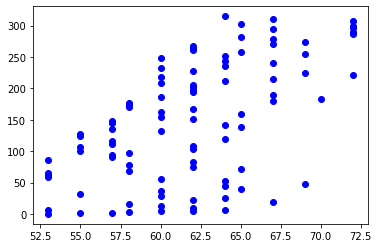

In [38]:
plt.plot(df["pitch"],df.index.values.tolist(),"bo")